<a href="https://colab.research.google.com/github/ZhengtingHe/DarkSHINE_GAN/blob/main/Variables_checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import seaborn as sns
!pip install deepdish
import deepdish as dd
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
target_path = '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/'
target_hdf5_filenames = target_path + 'GMM_ECAL_ana_8e5_variables.hdf5'
#original_hdf5_filenames = '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/GeneratedVariables/2021-07-09_17:19:00_PN_ECAL_4e5generated_variables.hdf5'
original_path = '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/GeneratedVariables/'
original_hdf5_filenames = original_path + '2021-07-13_02:19:17_GMM_ECAL_8e5generated_variables.hdf5'

In [25]:
target_variable_data = dd.io.load(target_hdf5_filenames)
original_variable_data = dd.io.load(original_hdf5_filenames)

In [26]:
selected_variables = ['total energy', 'x_moment', 'y_moment', 'x_sq', 'y_sq', 'r', 'E_max']
#selected_variables = target_variable_data.keys()
units = {
    'total energy': r'$E_{total}$ ($MeV$)',
    'x_moment': r'$<x>$ ($mm$)', 
    'y_moment': r'$<y>$ ($mm$)', 
    'x_sq' :r'$<x^{2}>$ ($mm^{2}$)', 
    'y_sq' :r'$<y^{2}>$ ($mm^{2}$)', 
    'r' : r'$<r>$ (mm)', 
    'E_max': r'$E_{max}$ ($MeV$)'
}
target = pd.DataFrame(data={key:target_variable_data[key] for key in selected_variables})
original = pd.DataFrame(data={key:original_variable_data[key] for key in selected_variables})
for col in target.columns:
    original = original[
                        (original[col] <= target[col].max()) &
                        (original[col] >= target[col].min())
                        ]

In [27]:
rn_target = target.rename(columns=units)
rn_original = original.rename(columns=units)

In [28]:
original['type'] = 'GAN'
target['type'] = 'DSS'
combined_df = pd.concat([original,target])

In [35]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
def corr_pairplot(data):
    sns.set(font_scale=1.5)
    e = sns.pairplot(data,kind="hist")
    e.map_upper(hide_current_axis)

    (xmin, _), (_, ymax) = e.axes[0, 0].get_position().get_points()
    (_, ymin), (xmax, _) = e.axes[-1, -1].get_position().get_points()

    ax = e.fig.add_axes([xmin, ymin, xmax - xmin, ymax - ymin], facecolor='none')

    corr1 = data.corr()
    mask1 = np.tril(np.ones_like(corr1, dtype=bool))
    sns.heatmap(corr1, mask=mask1, cmap="YlGnBu", vmax=.5, vmin=-.5,
                linewidths=.5, cbar=False, annot=True, annot_kws={'size': 22}, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.xaxis.tick_top()
    # ax.yaxis.tick_right()
    

    plt.show()

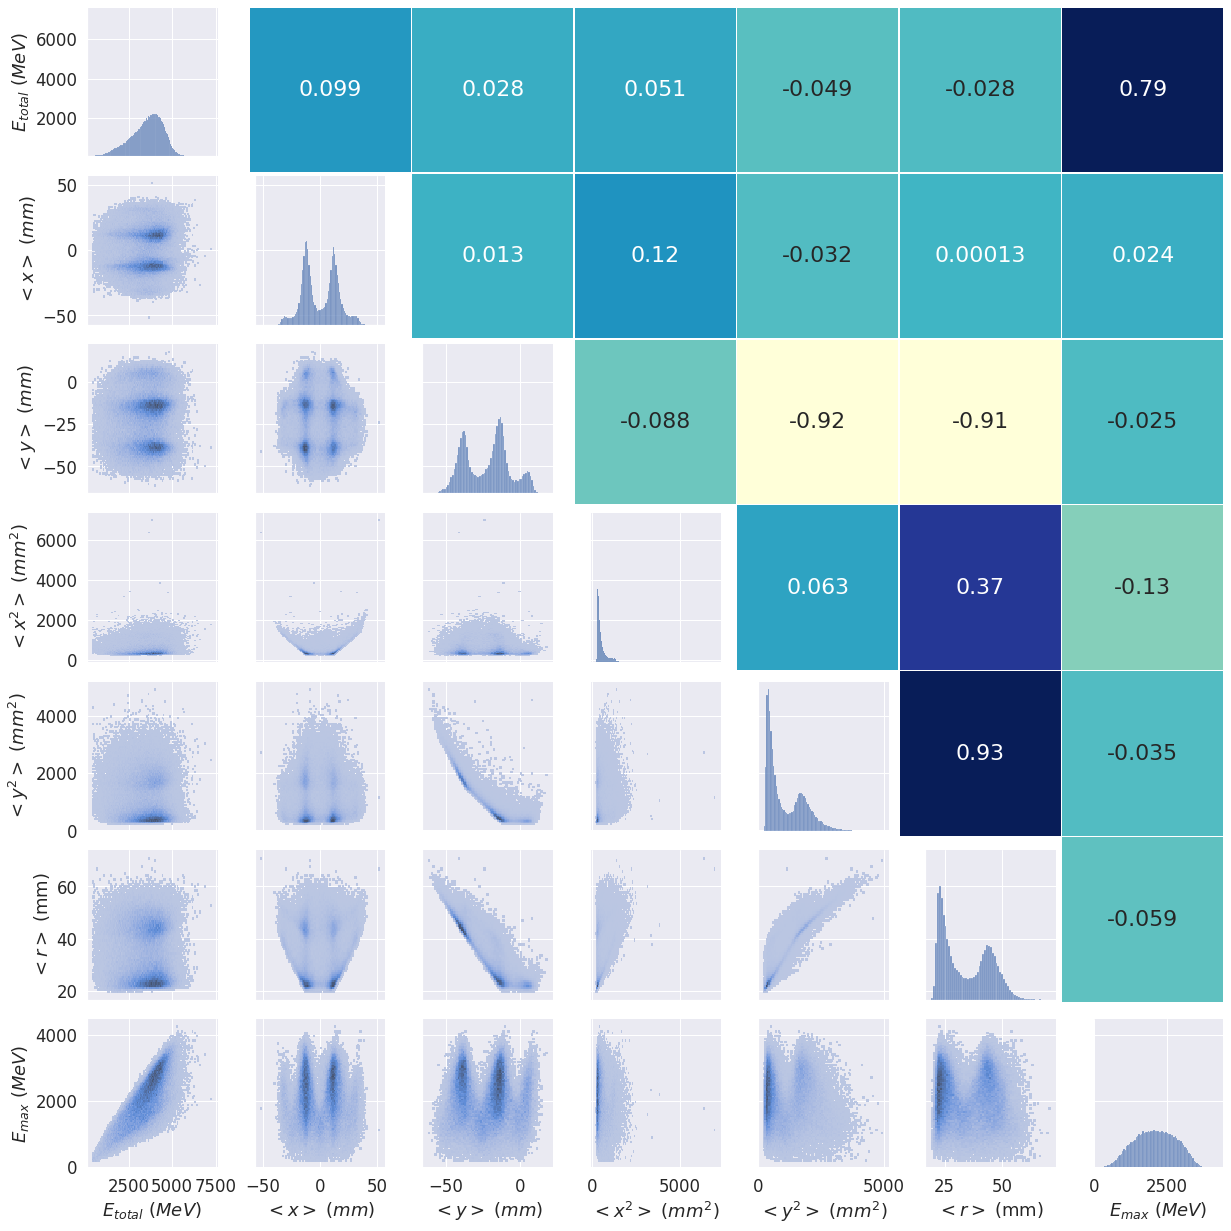

In [36]:
corr_pairplot(rn_original)

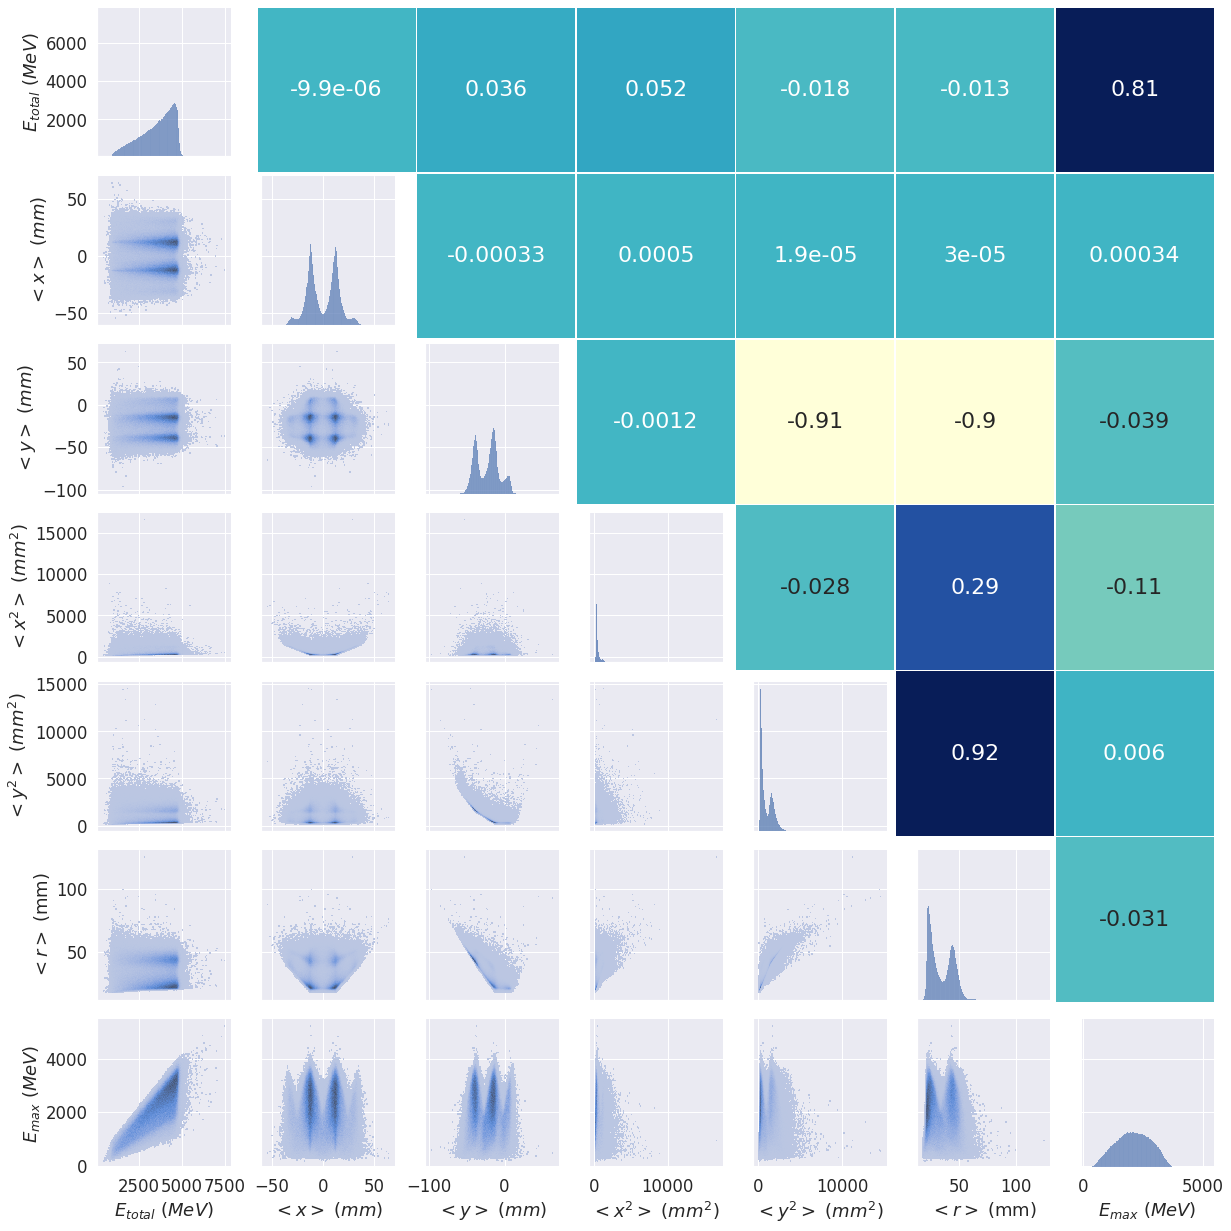

In [37]:
corr_pairplot(rn_target)